# Imports

- **Replace Null Values in Age column**

### 4- Handle Outliers

- **Check for Outliers**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Chk datatype

In [4]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [5]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()
    
    return pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

In [6]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [7]:
cols = ['Pclass',
        'Survived',
        'Sex',
        'SibSp',
        'Parch',
        'Embarked']
df[cols] = df[cols].astype('category')


In [8]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [9]:
df.shape[0]

891

In [10]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [11]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


In [12]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin", axis=1)

In [13]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['Age', 'Fare'], dtype='object')

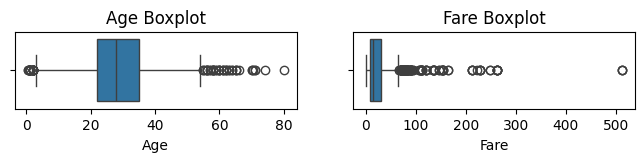

In [15]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8,1))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} Boxplot")

In [16]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)
    Lower_Fence = Q1 - 1.5*IQR
    Upper_Fence = Q3 + 1.5*IQR
    Lower_Outliers = df[df[col]< Lower_Fence][col].values
    Upper_Outliers = df[df[col]> Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace= True)
    df[col].replace(Upper_Outliers,Upper_Fence,inplace= True)

In [17]:
df.duplicated().sum()

np.int64(129)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

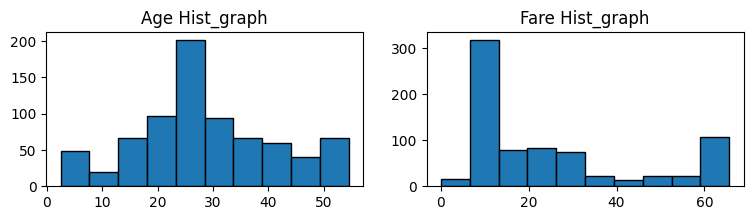

In [20]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9,2))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],edgecolor= "black")
    plt.title(f"{col} Hist_graph")
plt.show()

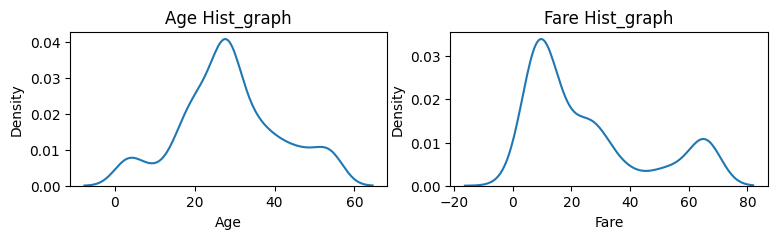

In [21]:

num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9,2))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Hist_graph")
plt.show()

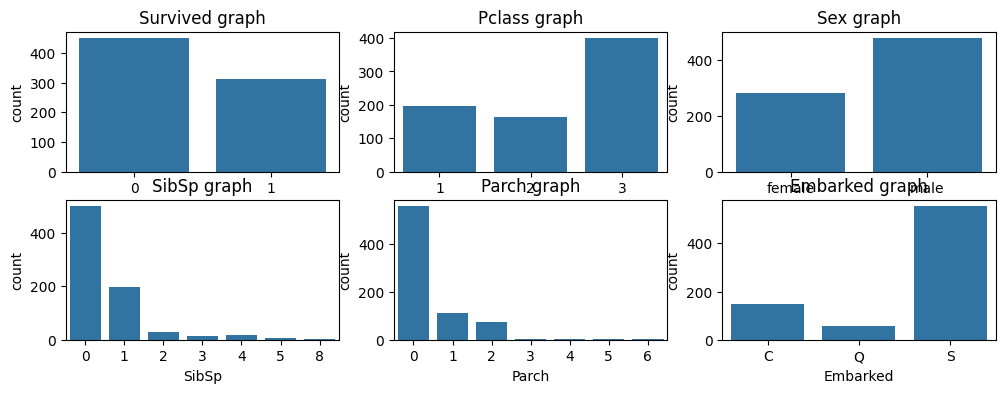

In [22]:

cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, data = df)
    plt.title(f"{col} graph")
plt.show()

In [23]:
unique = df["Pclass"].value_counts()
count = unique.values
print(unique)
print(count)

Pclass
3    399
1    198
2    163
Name: count, dtype: int64
[399 198 163]


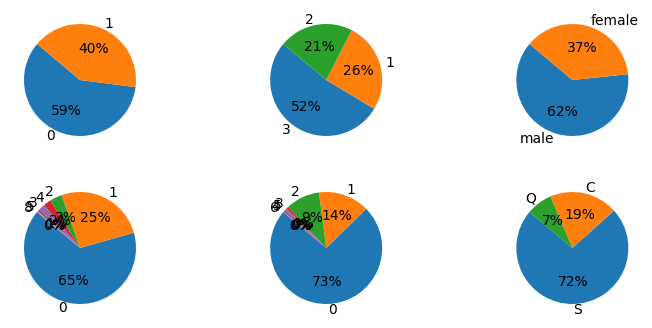

In [24]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, startangle= 140, autopct="%1.1d%%")

Text(0, 0.5, 'Fare')

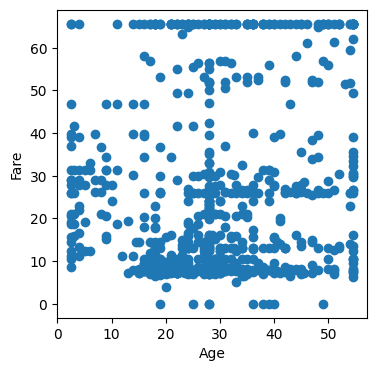

In [25]:
plt.figure(figsize=(4,4))
plt.scatter(df["Age"],df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
## Very weak relationship

<Axes: >

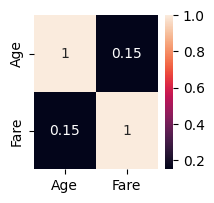

In [26]:
corr = df[num_cols].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)

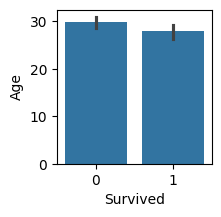

In [27]:
plt.figure(figsize=(2,2))
sns.barplot(x= "Survived", y="Age",  data=df)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

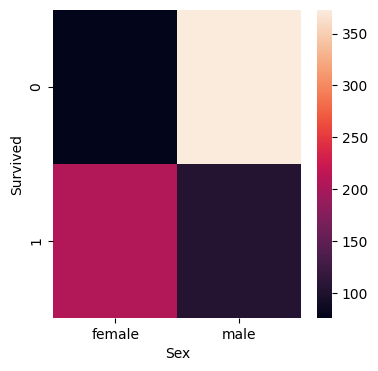

In [28]:
plt.figure(figsize=(4,4))
agg = df.pivot_table(index= "Survived",columns= "Sex",values= "Age", aggfunc=len)
sns.heatmap(agg)

### 7- Data Splitting

In [29]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]


### 8- Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
num_cols = X.select_dtypes("number").columns #age-fare
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

### 9- Encoding

- **Check for Number of Unique Values**

In [32]:
str_cols = ["Sex", "Embarked"]
pd.DataFrame(X[str_cols].nunique()).T

,Sex,Embarked
0,2,3


- **One Hot Encoder**

In [33]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)
X

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.701923,0,5,0.443598,0,0,1
887,1,0,1,0.317308,0,0,0.456925,1,0,0
888,3,0,1,0.490385,1,2,0.357163,1,0,0
889,1,1,0,0.451923,0,0,0.456925,0,1,0


In [34]:
df_2 = pd.read_csv("insurance.csv")
df_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
dtype = df_2.dtypes
dtype

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
dtype = df_2.dtypes 
num_unique = df_2.nunique()
pd.DataFrame({"Dtype":dtype,
              "n_unique":num_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtype,int64,object,float64,int64,object,object,float64
n_unique,47,2,548,6,2,4,1337


In [37]:
cat_cols = ["sex","children","smoker","region"]
df_2[cat_cols] = df_2[cat_cols].astype("category")

In [38]:
pd.DataFrame(df_2.dtypes).T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


In [39]:
pd.DataFrame(df_2.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


In [ ]:
num_cols = ["age","bmi"]
plt.figure(figsize=(10,1))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{col}")
    sns.boxplot(df_2[cols], orient="h")
plt.show()

In [44]:
print(df_2.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
